<a href="https://colab.research.google.com/github/Chirag314/HousePrices/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [31]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter01/HousePrices.csv'
housepricesdata = pd.read_csv(url)
#df = pd.read_csv(url)
print(housepricesdata.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [32]:
print(housepricesdata.shape)

(1460, 81)


In [33]:
housepricesdata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [34]:
# Check all numeric data distributions
housepricesdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
# Drop ID column as its not necessary for analysis
housepricesdata.drop(['Id'],axis=1,inplace=True)
housepricesdata.shape

(1460, 80)

In [36]:
# Lets check distribution of some of the categorical variables.
# LotShape and LandContour lets check with the help of crosstab frequency

lotshape_frequencies=pd.crosstab(index=housepricesdata['LotShape'],columns='count')
landcontour_frequencies=pd.crosstab(index=housepricesdata['LandContour'],columns='count')

print(lotshape_frequencies)
print('\n')
print(landcontour_frequencies)

col_0     count
LotShape       
IR1         484
IR2          41
IR3          10
Reg         925


col_0        count
LandContour       
Bnk             63
HLS             50
Low             36
Lvl           1311


In [37]:
# MSSubClass OverallQual and OVerCOnd are all categorical variables but while importing data, they get converted to integer.
#LEts convert them back to categorical.
housepricesdata['MSSubClass']=housepricesdata['MSSubClass'].astype('object')
housepricesdata['OverallQual']=housepricesdata['OverallQual'].astype('object')
housepricesdata['OverallCond']=housepricesdata['OverallCond'].astype('object')

#Check datatype after type converstion
print(housepricesdata['MSSubClass'].dtype)
print('\n')

#Check cross tabl frequency

print(pd.crosstab(index=housepricesdata['MSSubClass'],columns='count'))

object


col_0       count
MSSubClass       
20            536
30             69
40              4
45             12
50            144
60            299
70             60
75             16
80             58
85             20
90             52
120            87
160            63
180            10
190            30


In [38]:
# YearBuild and YearRemodAdd represent original construction date and the remodel date respectively. However if they can be converted into age, they can tell us how old the buildings are and how many years it has been since they were remodeled.
import datetime as dt
# Find the current year
current_year=int(dt.datetime.now().year)

#Subtract year built from current year
building_age=current_year-housepricesdata['YearBuilt']
remodelled_age=current_year-housepricesdata['YearRemodAdd']

In [39]:
#Add these two variables in the dataset
housepricesdata['building_age']=building_age
housepricesdata['remodelled_age']=remodelled_age

# Check dataframe again
housepricesdata.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,building_age,remodelled_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19,19
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46,46
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21,20
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,52
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22,22


In [40]:
# Encode variables thata contains label data
#Variables that need encoding are Street, LotShape, and LandContour

# use get_dummies() function 
one_hot_endoced_variables=pd.get_dummies(housepricesdata['LotShape'],prefix='LotShape')

# Print the onehote encoded varliables
print(one_hot_endoced_variables)

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg
0                0             0             0             1
1                0             0             0             1
2                1             0             0             0
3                1             0             0             0
4                1             0             0             0
5                1             0             0             0
6                0             0             0             1
7                1             0             0             0
8                0             0             0             1
9                0             0             0             1
10               0             0             0             1
11               1             0             0             0
12               0             1             0             0
13               1             0             0             0
14               1             0             0             0
15               0      

In [41]:
# Add one hot encoded variable to the dataframe
housepricesdata=pd.concat([housepricesdata,one_hot_endoced_variables],axis=1)

housepricesdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,building_age,remodelled_age,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19,19,0,0,0,1
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46,46,0,0,0,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21,20,1,0,0,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,52,1,0,0,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22,22,1,0,0,0


In [42]:
# Remove original variable since we have already created one hot encoded variables
housepricesdata.drop(['LotShape'],axis=1,inplace=True)

In [43]:
# Check missing values

columns_with_missing_values= housepricesdata.columns[housepricesdata.isnull().any()]
housepricesdata[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Text(0.5, 1.0, 'variables with missing values')

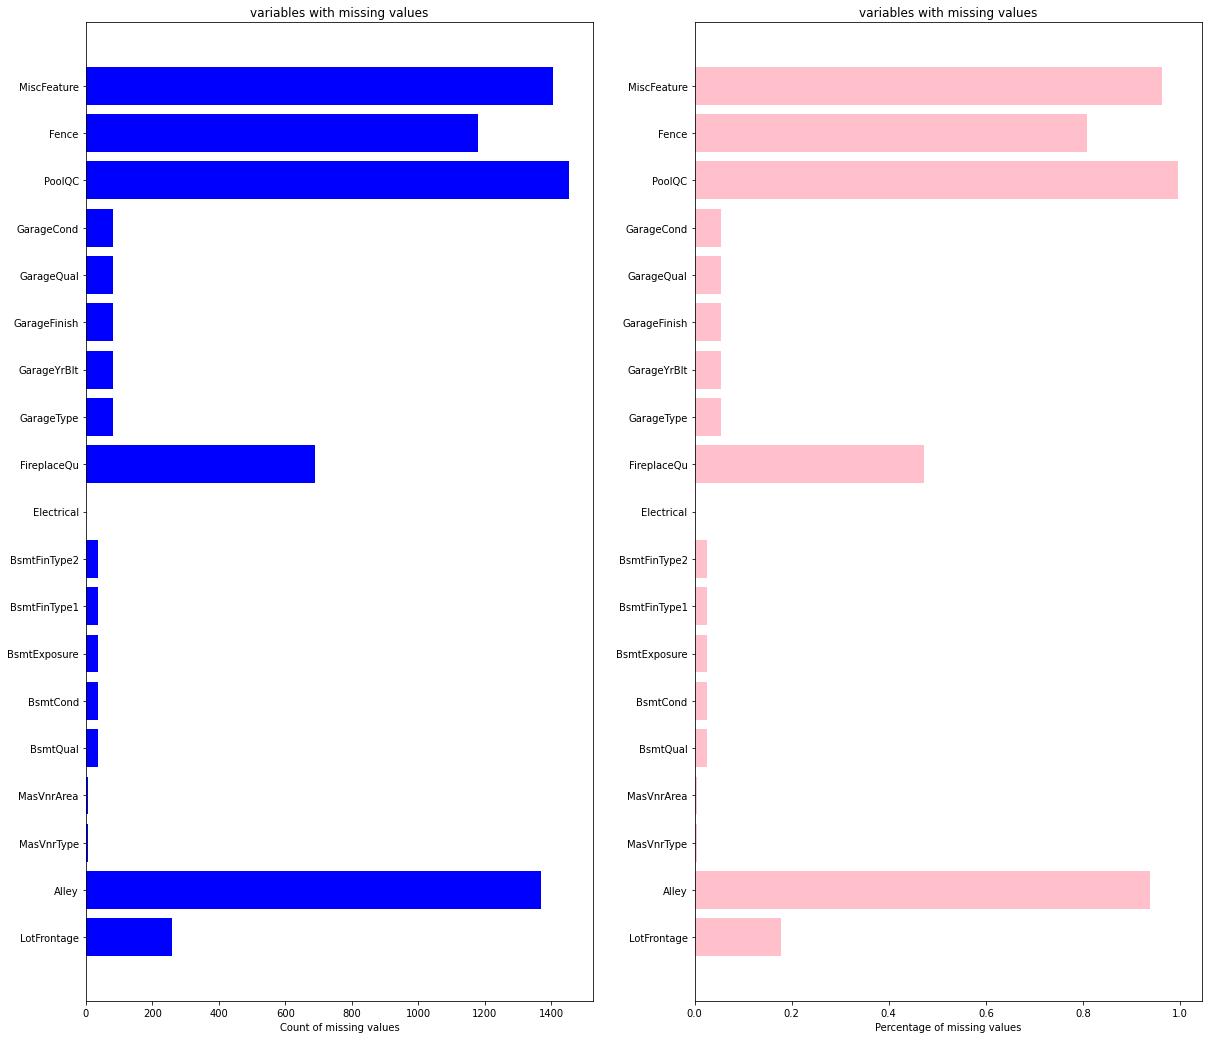

In [44]:
# Missing values in terms of percentages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to hold variable names
labels =[]
#to hold count of missing values
valuecount=[]
#to hold the percentage of missing vlaues
percentcount=[]

for col in columns_with_missing_values:
  labels.append(col)
  valuecount.append(housepricesdata[col].isnull().sum())
  #housepricedata.shape[0] will give the total row count
  percentcount.append(housepricesdata[col].isnull().sum()/housepricesdata.shape[0])

ind=np.arange(len(labels))

fig, (ax1, ax2)=plt.subplots(1,2,figsize=(20,18))

rects=ax1.barh(ind, np.array(valuecount),color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation ='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("variables with missing values")

rects=ax2.barh(ind, np.array(percentcount),color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("variables with missing values")

####But there is a catch. Let's look at the Alley variable again. It shows us that it has 93.76% missing values. Now take another look at the data description that we looked at in the preceding section. The variable description for Alley shows that it has three levels: gravel, paved, and no access. In the original dataset, 'No Access' is codified as NA. When NA is read in Python, it is treated as NaN, which means that a value is missing, so we need to be careful. 

In [45]:
#Replacing missing values with 'No Acces' in alley variables
housepricesdata['Alley'].fillna('No Access',inplace=True)


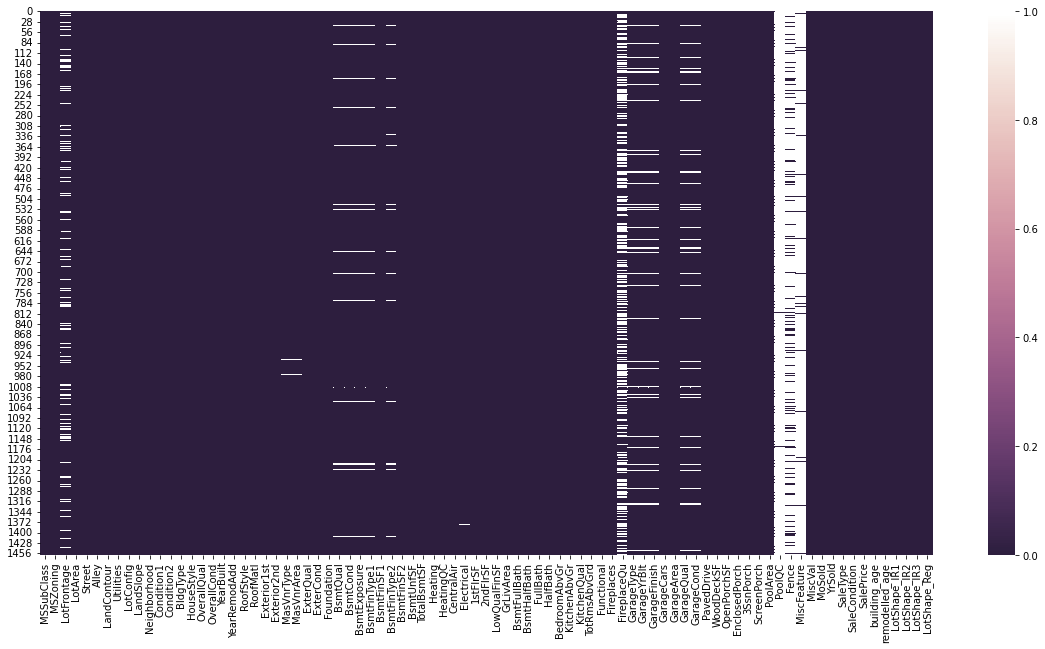

In [46]:
#Lets visualize missing values and try to see how we can treat them.
import seaborn as sns
plt.figure(figsize=(20,10))
cmap=sns.cubehelix_palette(light=1,as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)

In [47]:
#Lotfrontae is a continuous variable aand has 17% missing values. Replace the missing values with median
housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(),inplace=True)

In [48]:
#Lets impute all other missing values.
# Replacing all NA values with their original meaning
housepricesdata['BsmtQual'].fillna('No Basement', inplace=True)
housepricesdata['BsmtCond'].fillna('No Basement', inplace=True)
housepricesdata['BsmtExposure'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType1'].fillna('No Basement', inplace=True)
housepricesdata['BsmtFinType2'].fillna('No Basement', inplace=True)

housepricesdata['GarageYrBlt'].fillna(0, inplace=True)

# For observations where GarageType is null, we replace null values in GarageYrBlt=0
housepricesdata['GarageType'].fillna('No Garage', inplace=True)
housepricesdata['GarageFinish'].fillna('No Garage', inplace=True)
housepricesdata['GarageQual'].fillna('No Garage', inplace=True)
housepricesdata['GarageCond'].fillna('No Garage', inplace=True)


housepricesdata['PoolQC'].fillna('No Pool', inplace=True)
housepricesdata['Fence'].fillna('No Fence', inplace=True)
housepricesdata['MiscFeature'].fillna('None', inplace=True)

housepricesdata['FireplaceQu'].fillna('No Fireplace', inplace=True)

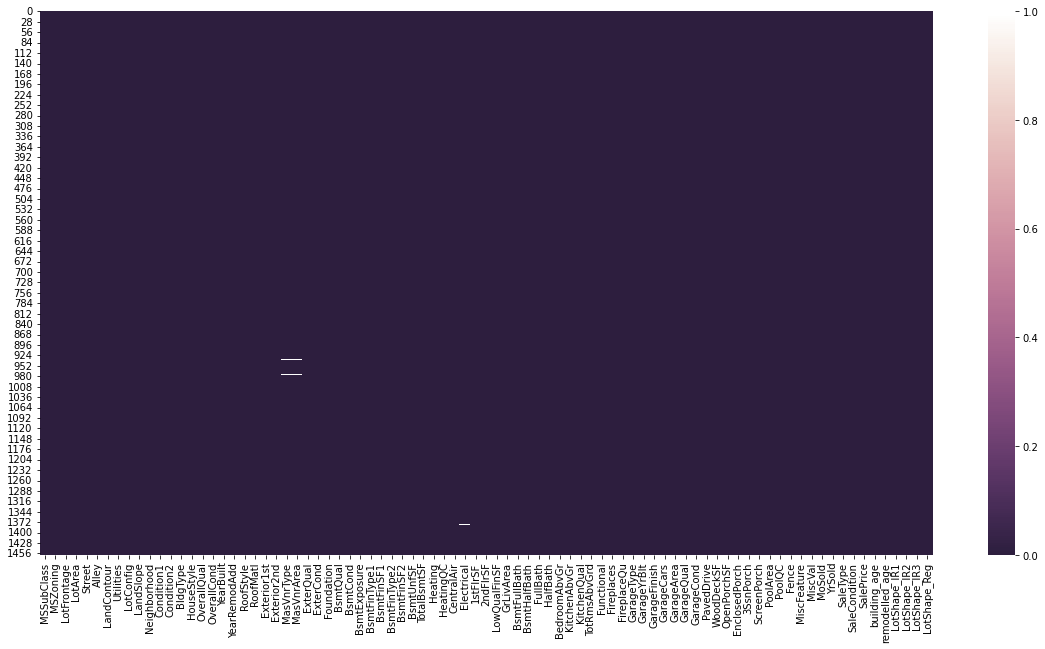

In [49]:
# Check missing values plot again.
#Lets visualize missing values and try to see how we can treat them.
import seaborn as sns
plt.figure(figsize=(20,10))
cmap=sns.cubehelix_palette(light=1,as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(),cmap=cmap)

In [50]:
#we are left with a few missing values in MasVnrType, MasVnrArea, and Electrical.
#Let's try to look at the distribution of MasVnrType by MasVnrArea with a crosstab

print(pd.crosstab(index=housepricesdata["MasVnrType"],columns=housepricesdata['MasVnrArea'],dropna=False,margins=True))

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  30.0  \
MasVnrType                                                                   
BrkCmn        0    0     0     0     0     0     0     0     0     0     0   
BrkFace       1    0     1     1     6     2     1     0     1     1     2   
None        859    2     0     0     0     0     0     0     0     0     0   
Stone         1    0     0     0     1     0     0     1     0     0     0   
All         861    2     1     1     7     2     1     1     1     1     2   

MasVnrArea  31.0  32.0  34.0  36.0  38.0  40.0  41.0  42.0  44.0  45.0  46.0  \
MasVnrType                                                                     
BrkCmn         0     0     0     0     0     0     1     0     0     0     0   
BrkFace        1     1     1     0     1     4     0     2     3     2     1   
None           0     0     0     0     0     0     0     0     0     0     0   
Stone          0     0     0     1     0     0     0 

####The following output shows that when MasVnrArea is zero, we have MasVnrType as None in the majority of cases,We will then impute the missing values in MasVnrType with None and MasVnrArea with zero.

In [51]:
housepricesdata['MasVnrType'].fillna('None',inplace=True)
housepricesdata['MasVnrArea'].fillna(0,inplace=True)

#####We are still left with one missing value in the Electrical Variable


In [52]:
housepricesdata['MSSubClass'][housepricesdata['Electrical'].isnull()]

1379    80
Name: MSSubClass, dtype: object

In [53]:
#USe crosstabl to generate count of electrical type by MSSubClass
print(pd.crosstab(index=housepricesdata['Electrical'],columns=housepricesdata['MSSubClass'],dropna=False, margins=True))

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


#####From above, we can see that majority of Electrcal Values is SBRKr so impute missing values with SBrKr

In [54]:
housepricesdata['Electrical'].fillna('SBrKr',inplace=True)

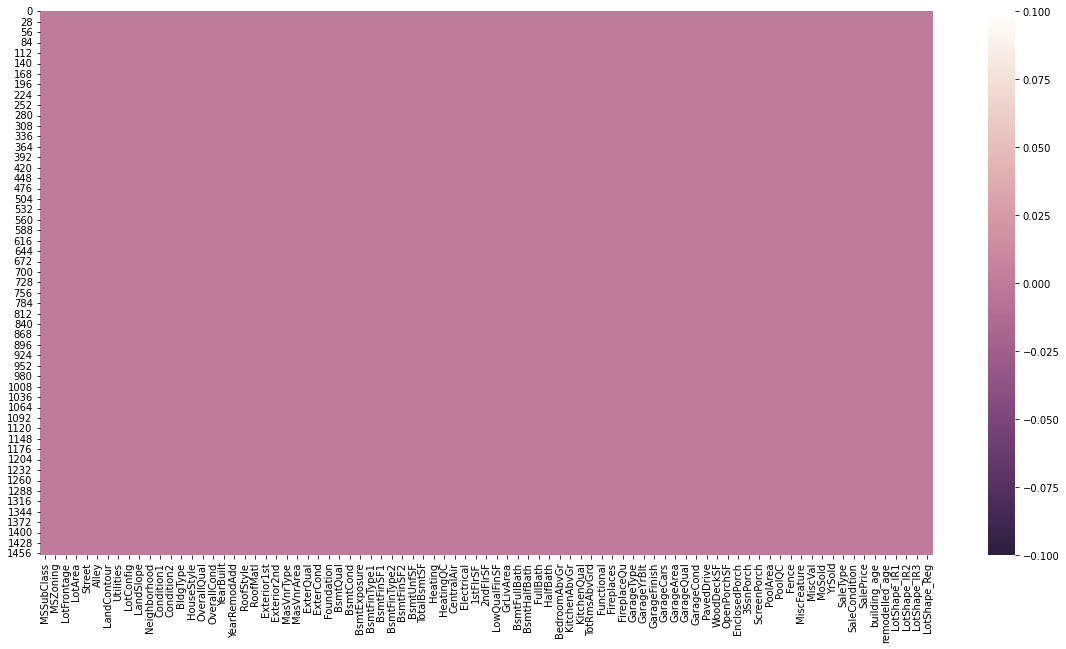

In [55]:
#Lets check missing values plot one more time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

In [56]:
#Lets look at the data again
housepricesdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,building_age,remodelled_age,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Pave,No Access,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,19,19,0,0,0,1
1,20,RL,80.0,9600,Pave,No Access,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,46,46,0,0,0,1
2,60,RL,68.0,11250,Pave,No Access,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,21,20,1,0,0,0
3,70,RL,60.0,9550,Pave,No Access,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,107,52,1,0,0,0
4,60,RL,84.0,14260,Pave,No Access,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,22,22,1,0,0,0


In [57]:
#display summary stats
housepricesdata.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,building_age,remodelled_age,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,50.732192,37.134247,0.331507,0.028082,0.006849,0.633562
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.202904,20.645407,0.470916,0.165264,0.082505,0.481996
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,22.000000,18.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,49.000000,28.000000,0.000000,0.000000,0.000000,1.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,68.000000,55.000000,1.000000,0.000000,0.000000,1.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,150.000000,72.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
from pandas.core.groupby import categorical
#Let's create two variables to hold the names of the numerical and categorical variables:
numerical_features=housepricesdata.dtypes[housepricesdata.dtypes!="object"].index
print("Number of mumerical features: ",len(numerical_features))

categorical_features=housepricesdata.dtypes[housepricesdata.dtypes=="object"].index
print("Number of categorical features:",len(categorical_features))

Number of mumerical features:  40
Number of categorical features: 45


In [59]:
numerical_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'building_age',
       'remodelled_age', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg'],
      dtype='object')

KeyError: ignored

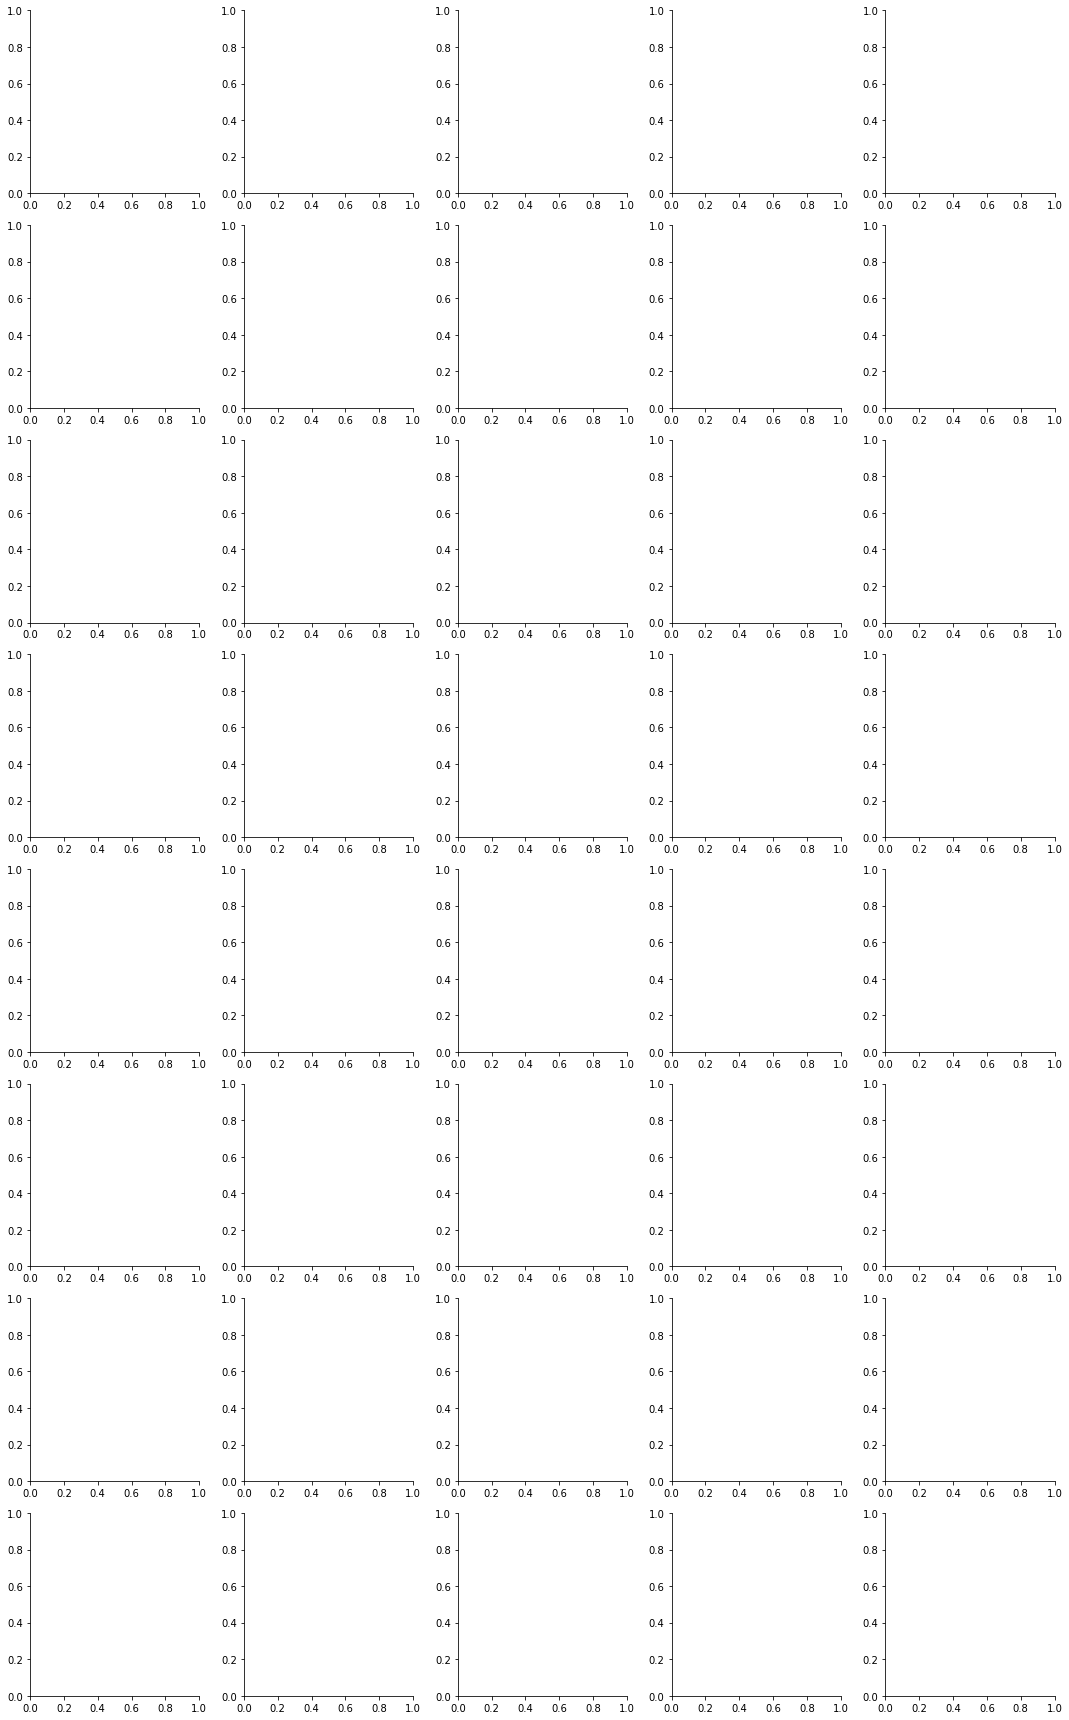

In [61]:
melt_num_features=pd.melt(housepricesdata,value_vars=numerical_features)
grid=sns.FacetGrid(melt_num_features,col="variable",col_wrap=5,sharex=False,sharey=False)
grid = grid.map(sns.distplot,"values",color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: ignored

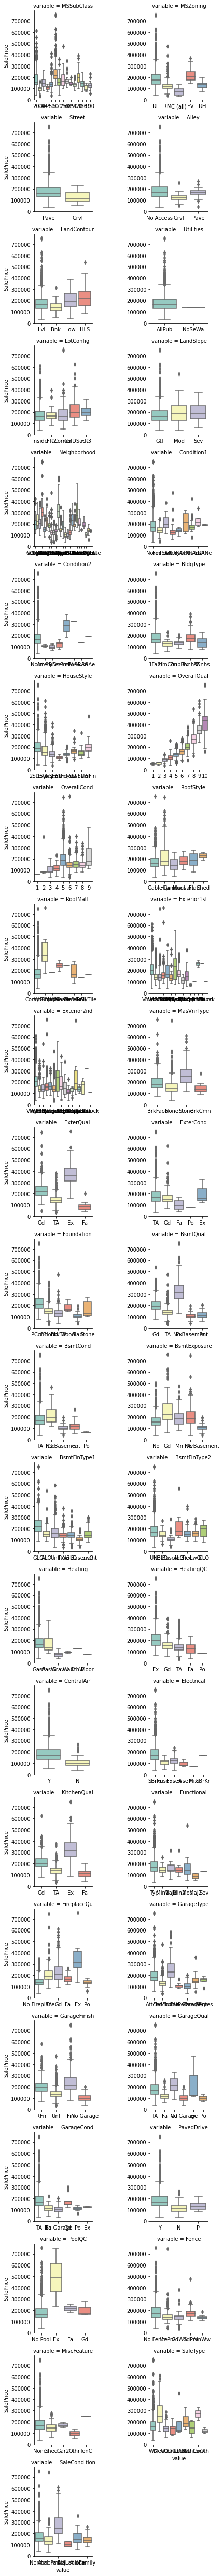

In [63]:
#Check categorical variables to plot distribution
melt_cat_features=pd.melt(housepricesdata,id_vars=['SalePrice'],value_vars=categorical_features)

grid = sns.FacetGrid(melt_cat_features,col="variable",col_wrap=2,sharex=False, sharey=False)
grid.map(sns.boxplot, "value","SalePrice",palette="Set3")
grid.fig.subplots_adjust(wspace=1,hspace=0.25)

for ax in grid.axes.flat:
  plt.step(ax.get_xticklabels(),rotation=90)

In [64]:
# lets check correlation matrix for all numeric variables.
corr=housepricesdata[numerical_features].corr()
print(corr)

                LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage        1.000000  0.304522   0.116685      0.083348    0.178469   
LotArea            0.304522  1.000000   0.014228      0.013788    0.103321   
YearBuilt          0.116685  0.014228   1.000000      0.592855    0.311600   
YearRemodAdd       0.083348  0.013788   0.592855      1.000000    0.176529   
MasVnrArea         0.178469  0.103321   0.311600      0.176529    1.000000   
BsmtFinSF1         0.214367  0.214103   0.249503      0.128451    0.261256   
BsmtFinSF2         0.042463  0.111170  -0.049107     -0.067759   -0.071330   
BsmtUnfSF          0.124098 -0.002618   0.149040      0.181133    0.113862   
TotalBsmtSF        0.363472  0.260833   0.391452      0.291066    0.360067   
1stFlrSF           0.413773  0.299475   0.281986      0.240379    0.339850   
2ndFlrSF           0.072388  0.050986   0.010308      0.140024    0.173800   
LowQualFinSF       0.037469  0.004779  -0.183784     -0.062419  

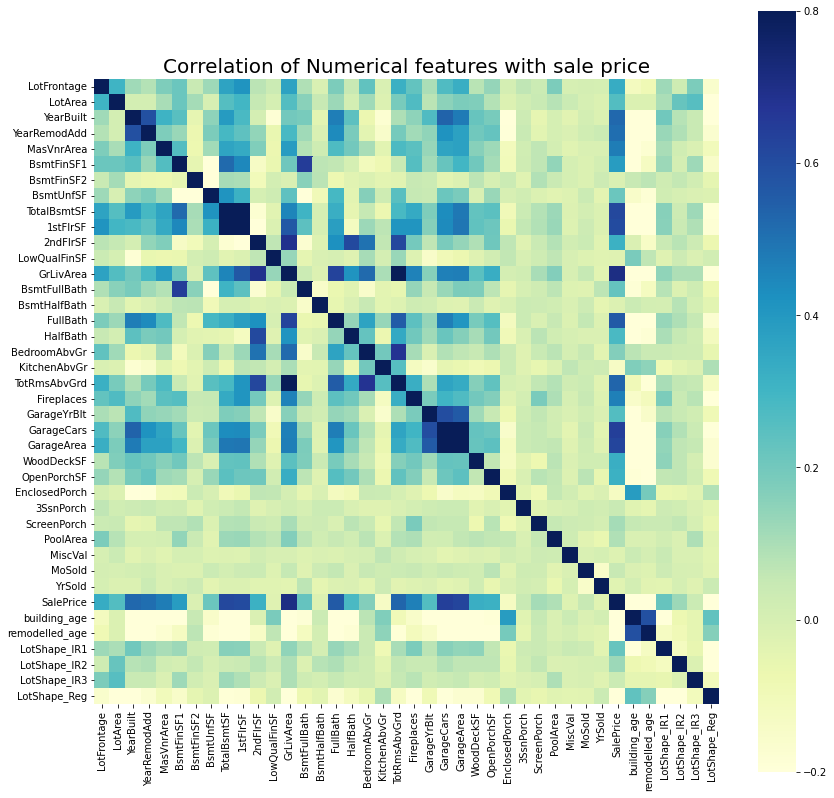

In [65]:
# Get correlation of numerical variables
df_numerical_features=housepricesdata.select_dtypes(include=[np.number])
correlation=df_numerical_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

# Correlation map
f, ax=plt.subplots(figsize=(14,14))
plt.title("Correlation of Numerical features with sale price",y=1,size=20)
sns.heatmap(correlation, square=True, vmin=-0.2,vmax=0.8,cmap='YlGnBu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


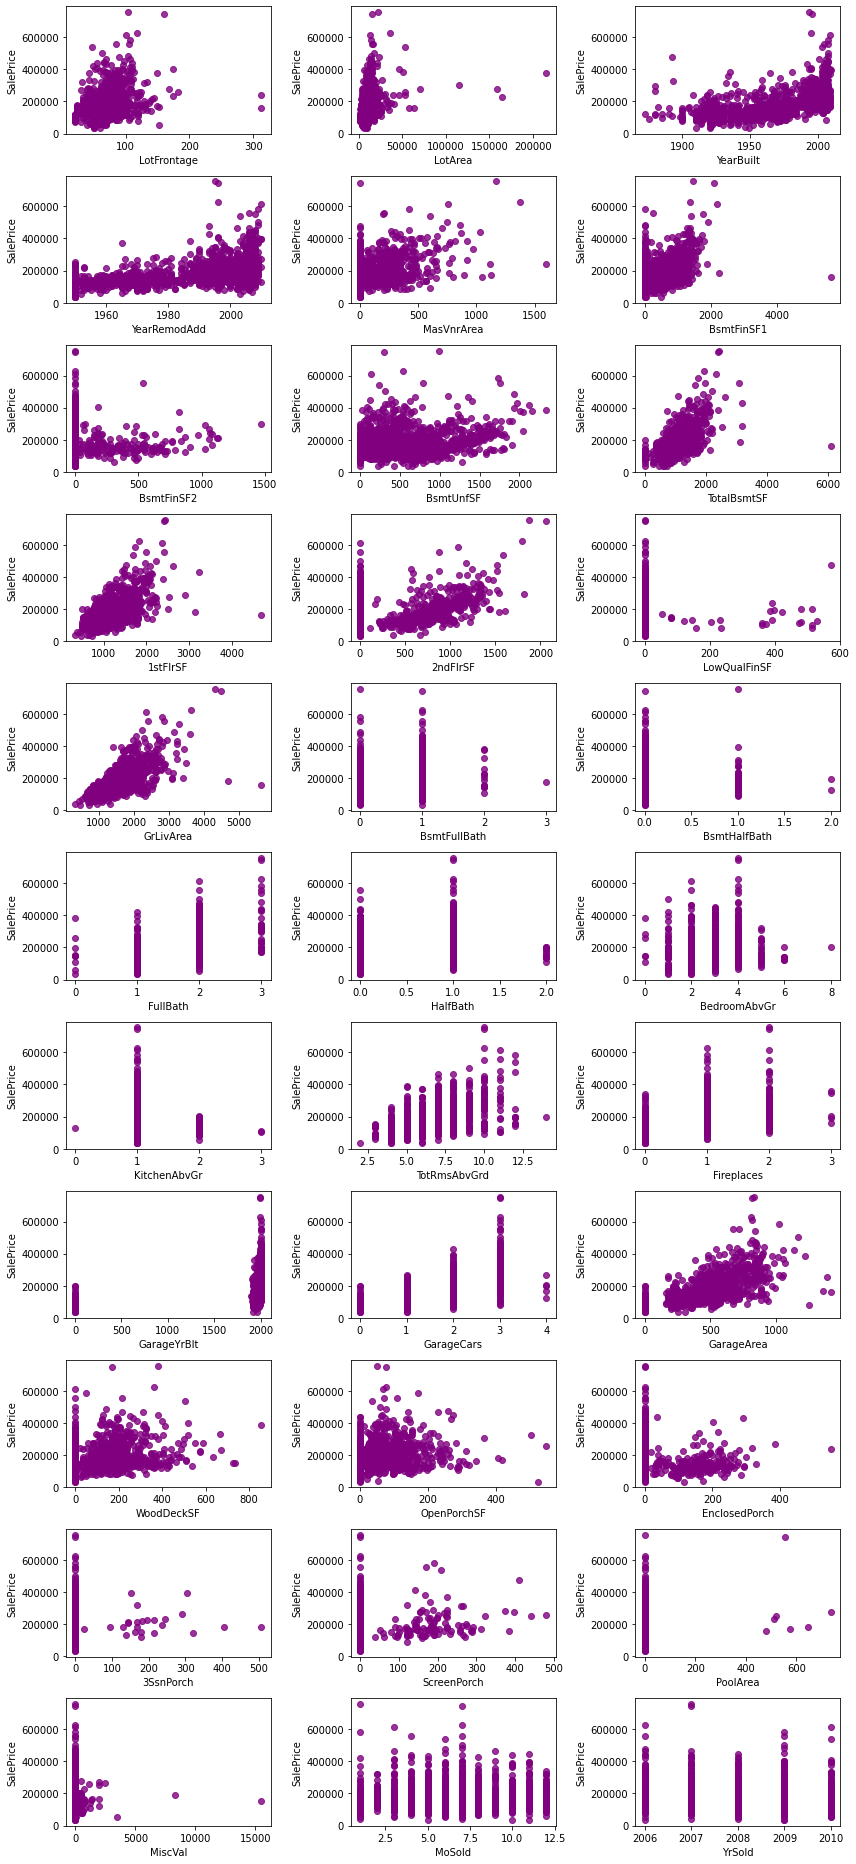

In [68]:
# We may also want to evalueate how the correlation of numerical variabels with saleprice

row_count=11
col_count=3
fig,axs=plt.subplots(row_count,col_count,figsize=(12,26))
exclude_columns=['Id','SalePrice']
plot_numeric_features=[col for col in numerical_features if col not in exclude_columns]

for eachrow in range(0,row_count):
  for eachcol in range(0,col_count):
    i=eachrow*col_count+eachcol
    if i<len(plot_numeric_features):
      sns.regplot(housepricesdata[plot_numeric_features[i]],housepricesdata['SalePrice'],ax=axs[eachrow][eachcol],color='purple',fit_reg=False)

#tight_layout automatically adjusts subplots params so that subbplots fit in the gifure areas
plt.tight_layout()
plt.show()